<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Real-time-forecasts-and-risk-assessment-of-novel-coronavirus-(COVID-19)-cases:-A-data-driven-analysis" data-toc-modified-id="Real-time-forecasts-and-risk-assessment-of-novel-coronavirus-(COVID-19)-cases:-A-data-driven-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Real-time forecasts and risk assessment of novel coronavirus (COVID-19) cases: A data-driven analysis</a></span></li><li><span><a href="#Forecast-of-COVID-19-cases" data-toc-modified-id="Forecast-of-COVID-19-cases-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Forecast of COVID-19 cases</a></span></li><li><span><a href="#Risk-assessment-of-COVID-19-cases" data-toc-modified-id="Risk-assessment-of-COVID-19-cases-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Risk assessment of COVID-19 cases</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Summary Statistics</a></span></li></ul></li><li><span><a href="#Method:-Regression-Tree" data-toc-modified-id="Method:-Regression-Tree-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Method: Regression Tree</a></span><ul class="toc-item"><li><span><a href="#Paper-Model" data-toc-modified-id="Paper-Model-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Paper Model</a></span></li><li><span><a href="#RT-Europe" data-toc-modified-id="RT-Europe-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RT Europe</a></span></li></ul></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Results-and-models-comparison" data-toc-modified-id="Results-and-models-comparison-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Results and models comparison</a></span></li></ul></li><li><span><a href="#Limitations-of-our-findings" data-toc-modified-id="Limitations-of-our-findings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Limitations of our findings</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Real-time forecasts and risk assessment of novel coronavirus (COVID-19) cases: A data-driven analysis

The main focus of this paper is two-fold: 
   
1. generating **short term (real-time) forecasts** of the future COVID-19 cases for multiple countries; 

2. **risk assessment (in terms of case fatality rate) of the novel COVID-19** for some profoundly affected countries by finding various important demographic characteristics of the countries along with some disease characteristics. 

# Forecast of COVID-19 cases

For the first problem, they proposed a **hybridization of stationary ARIMA and non-stationary WBF model** to reduce the individual biases of the component models, that can generate short-term (ten days ahead) forecasts of the number of daily confirmed cases for Canada, France, India, South Korea, and the UK. The predictions of the future outbreak for different countries will be useful for the effective allocation of health care resources and will act as an early-warning system for government policymakers.

The $ARIMA(p,d,q)$ model can be mathematically expressed as follows: $$y_t = \theta_0 + \phi_1y_{t-1} + \phi_2y_{t-2} +...+\phi_py_{t-p}+\epsilon_t - \theta_1\epsilon_{t-1}-\theta_2\epsilon_{t-2}-...-\theta_q\epsilon_{t-q}$$

where:
-   $y_t$ denotes the actual value of the variable under consideration at time $t$.
-   $ε_t$ is the random error at time $t$.
-   $φ_i$ and $\theta_i$ are the coefficients of the $ARIMA$ model.
-   $p$ and $q$ are the order of the $AR$ model and the $MA$ model respectively, and $d$ is the level of differencing.

The *ARIMA* model fails to produce random errors or even stationary residual series. Thus, we choose the **wavelet function (WBF)** to model the remaining series. Firstly, an *ARIMA* model is built to model the linear components of the epidemic time series, and a set of out-of-sample forecasts are generated. In the second phase, the *ARIMA* residuals (oscillatory residual series) are remodeled using a *WBF* model. Here, *WBF* models the left-over autocorrelations in the residuals which *ARIMA* could not model. 

The algorithmic presentation of the proposed hybrid model is given in the table below:

<div>
<img src="../figures/Algorithm1.png">
</div>

The proposed model can be looked upon as an error remodeling approach in which we use *ARIMA* as the base model and remodel its error series by wavelet-based time series forecasting technique to generate more accurate forecasts.

As the *WBF* model is fitted on the residual time series, predictions are generated for the **next ten time steps** (5 April 2020 to 14 April 2020). Further, both the *ARIMA* forecasts and *WBF* residual forecasts are added together to get the final out-of-sample forecasts for the next ten days (5 April 2020 to 14 April 2020).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

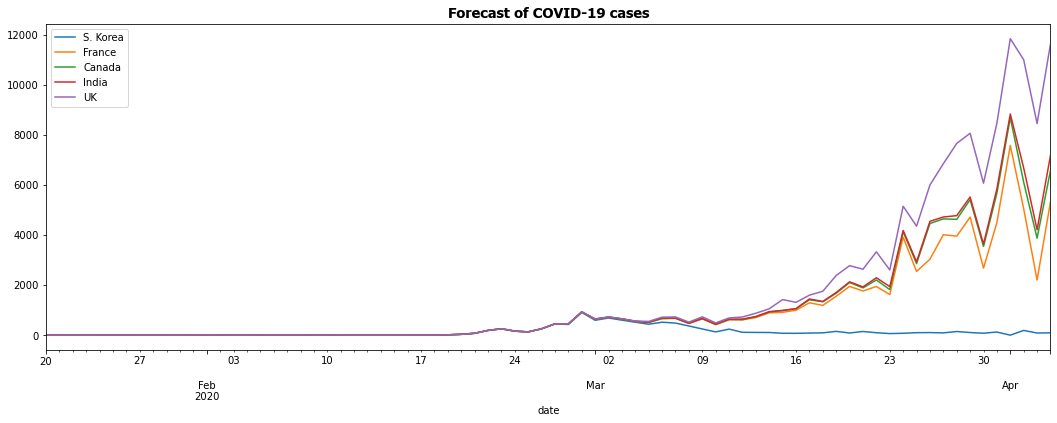

In [2]:
 arima_data = pd.read_excel("../data/Real_time_forecast_dataset_04_04_20.xlsx")
#Fix range
length=arima_data.count()
for k,i in enumerate(length):
    arima_data[arima_data.columns[k]]=arima_data[arima_data.columns[k]].shift(periods=len(arima_data)-i)
arima_data['date'] = pd.date_range(end='4/4/2020', periods=len(arima_data), freq='D')
arima_data = arima_data.set_index(arima_data['date']).drop(columns='date')

arima_data.plot(
    kind='line', stacked=True, figsize = (18,6)
).set_title('Forecast of COVID-19 cases',
            fontfamily='Tahoma',
            fontsize='x-large',
            fontstyle='italic',
            fontweight ='extra bold',
            fontvariant='small-caps');

Predictions made upon data of Covid-19 cases showing the number of daily new cases according to the **ARIMA-WBF model**.

In the original paper the graphs of the forecast are separated by country. We have simply put them all together to highlight the differences in number of cases in the different countries. 

In [3]:
actual = pd.read_csv("../data/Realtime_cases_plot.csv")
actual.loc[-1] = ['2020-01-20T00:00:00Z',0, 0, 0, 0, 0] # adding a row
actual.index = actual.index + 1 # shifting index
actual.sort_index(inplace=True)

actual['date'] = pd.date_range(end='4/4/2020', periods=len(actual), freq='D')
actual = actual.set_index(actual['date']).drop(columns='date')

S_Korea = pd.merge(actual["South Korea"], arima_data["S. Korea"], 'left', on='date')
France = pd.merge(actual["France"], arima_data["France"], 'left', on='date')
Canada = pd.merge(actual["Canada"], arima_data["Canada"], 'left', on='date')
India = pd.merge(actual["India"], arima_data["India"], 'left', on='date')
UK = pd.merge(actual["United Kingdom"], arima_data["UK"], 'left', on='date')

%run 'Graph_Fig.py'

The **hybrid model predictions** for Canada, France, India, South Korea and the UK, made by the authors are displayed below. The plot shows in *persian green* the actual data, while the in *paradise pink* the predictions running from 20th January until 4th April of 2020.

The predictions made by the authors seems to smoothly follow the pattern of the actual values, showing just a short delay.

In order to plot this graph, we downloaded the data from [**Our World in Data**](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-04-04..2020-04-14&facet=none&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Color+by+test+positivity=false&country=GBR~CAN~IND~FRA~KOR).

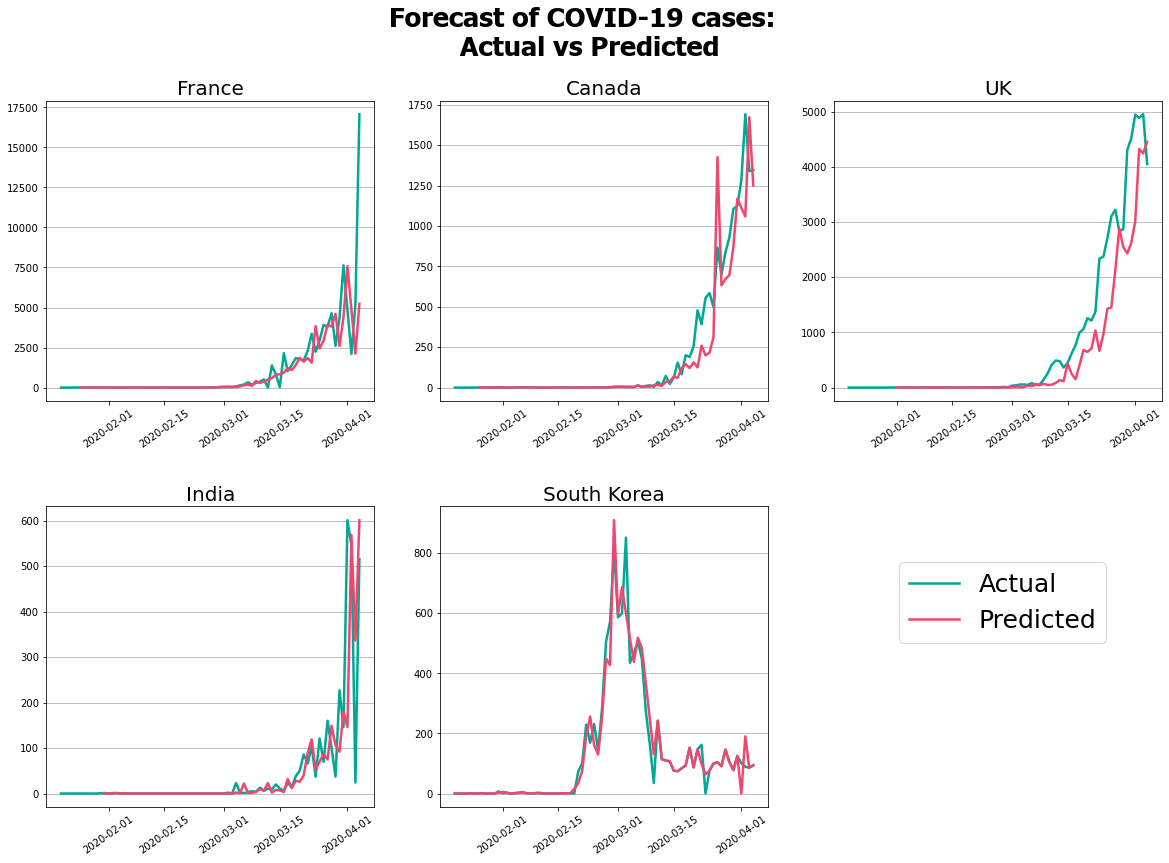

In [4]:
fig

# Risk assessment of COVID-19 cases

At the outset of the COVID-19 outbreak, data on country-wise case fatality rates due to COVID-19 were obtained for 50 affected countries. The **case fatality rate (CFR)** can be crudely defined as the number of deaths in persons who tested positive for COVID-19 divided by the confirmed number of COVID-19 cases. 

In this section, we are going to find out a list of essential causal variables that have strong influences on the *CFR*. The datasets and codes of this section are made publicly available at https://github.com/indrajitg-r/COVID for the reproducibility of this work.

A key differentiation among the *CFR* of different countries can be found by determining an exhaustive list of causal variables that significantly affect *CFR*. In this work, we put an effort to identify critical parameters that may help to assess the risk (in terms of *CFR*) using an **optimal regression tree model**.

The regression tree has a built-in *variable selection mechanism* from high dimensional variable space and can model arbitrary **decision boundaries**.  It combines case estimates, epidemiological characteristics of the disease, and health-care facilities to **assess the risks** of major outbreaks for profoundly affected countries. 

Such assessments will help to *anticipate* the expected **mortality due to COVID-19** and provide some critical information for the planning of health care systems in various countries facing this epidemic.

## Data

The CFR modeling dataset consists of $50$ observations having ten possible causal variables and one numerical output variable.

The possible *causal variables* considered in this study are the followings: 
- the total number of COVID-19 cases (*in thousands*) in the country till 4 April, 2020, 
- population density per $km^2$ for the country,
- total population (*in millions*) of the country,
- percentage of people in the age group of greater than 65 years,
- lockdown days count (from the starting day of lockdown till April 4, 2020), 
- time-period (*in days*) of COVID-19 cases for the country (starting date to April 4, 2020), 
- doctors per 1000 people in the country, 
- hospital beds per 1000 people in the country, 
- income standard (e.g., *high or low*) of the country,
- climate zones (e.g., *tropical, subtropical or moderate*) of the country. 

The dataset contains a total of 8 numerical input variables and 2 categorical input variables.

In [5]:
#Set colors to default
mpl.rcParams.update(mpl.rcParamsDefault)

%run 'Graph_Flag.py'

In [6]:
flags

This table shows the dataset we have used for the analysis. The data was available from the authors' repository. We have displayed it with style to highlight the number of cases and a *in-table barplot* to easily compare the number of deaths for country.

The dependent variable of this study is the **CFR**, the second-last column of this table, marked in bold.

### Summary Statistics

In [7]:
summary = covid_data.describe().transpose()
summary['variance']=np.square(summary['std'])
summary = summary.drop(columns=['count', 'std','25%', '50%', '75%'])
summary.round(2)

mean    min       max    variance
cases in thousands             20.90   0.25    277.96     2187.92
population (in millions)      110.62   0.03   1402.01    73658.12
population density/km2        149.78   3.00    568.00    20371.56
% People (>65)                 13.58   3.20     27.00       38.59
no. of days since shutdown     20.20   0.00     73.00       95.96
time of arival (till today)    48.72  25.00     84.00      309.23
Doctors per 1000 people         2.71   0.20      6.36        1.98
Hospital beds per 1000          3.93   0.10     13.70        8.25
CFR                             0.04   0.01      0.13        0.00
Total deaths                 1151.98  20.00  14681.00  8205536.59

## Method: Regression Tree

For the risk assessment with the CFR dataset for 50 countries, we apply the **Regression Tree (RT)**, a *non-parametric supervised learning* method used for regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The corresponding machine learning algorithm is **Classification and Regression Trees (CART)**. 

The basic idea behind the algorithm is to find the point in the independent variable to *split the data-set* into 2 parts, so that the **mean squared error is the minimized** at that point. In other words it takes a feature and determines which cut-off point *minimizes the variance* of $y$ for a regression task, as the variance tells us how much the $y$ values in a node are spread around their mean value $\bar{y}$. As a consequence, the best cut-off point makes the two resulting subsets as different as possible with respect to the target outcome

The algorithm continues this **search-and-split** recursively and different *subsets* of the dataset are created until a *stop criterion* is reached. Possible criteria are: A minimum number of instances that have to be in a node before the split, or the minimum number of instances that have to be in a terminal node.

The intermediate subsets are called **internal nodes** (or **split nodes**) and the final subsets are called **terminal** (or **leaf nodes**). To predict the outcome in each leaf node, the average outcome of the training data in this node is used.


### Paper Model
Decision trees can also be applied to regression problems, using the `DecisionTreeRegressor` class.

Basic regression trees partition a data set into smaller subgroups and then fit a simple constant for each observation in the subgroup. The partitioning is achieved by successive binary partitions (**recursive partitioning**) based on the different predictors. The constant to predict is based on the average response values for all observations that fall in that subgroup.

###### Considerations

After running the model proposed by the authors, the **regression tree *(RT)*** did not correspond to the one published in the paper. Looking at the variable importance graph we noticed that the variables considered were 9 instead of 10 as initially mentioned by the authors. 

Therefore, we have also excluded the variable *'Climate Zones'* (*x.x10*).
After this truncation, it still does not correspond entirely to the one in the paper. The authors used the software `R` to compute the analysis whereas we used `Python`. Different version of different softwares have different **computational costs** and sometimes the algorithms are performed in different ways. Hence we think that the differences derive from this reason.

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [9]:
#We exclude Total Deaths and Climate Zones as in the paper
X = covid_data.drop(columns=['CFR', 'Total deaths', 'Climate zones'])
y = covid_data['CFR']

# We equal the parameters as the control parameters of the corresponfing R function 'rpart' used in the paper
model = tree.DecisionTreeRegressor(criterion= "mse",       # $method='anova'
                                   min_samples_split = 5,  # $minsplit = 5
                                   max_depth=30,           # $maxdepth
                                   min_samples_leaf=2)     # $minbucket
model.fit(X,y  );

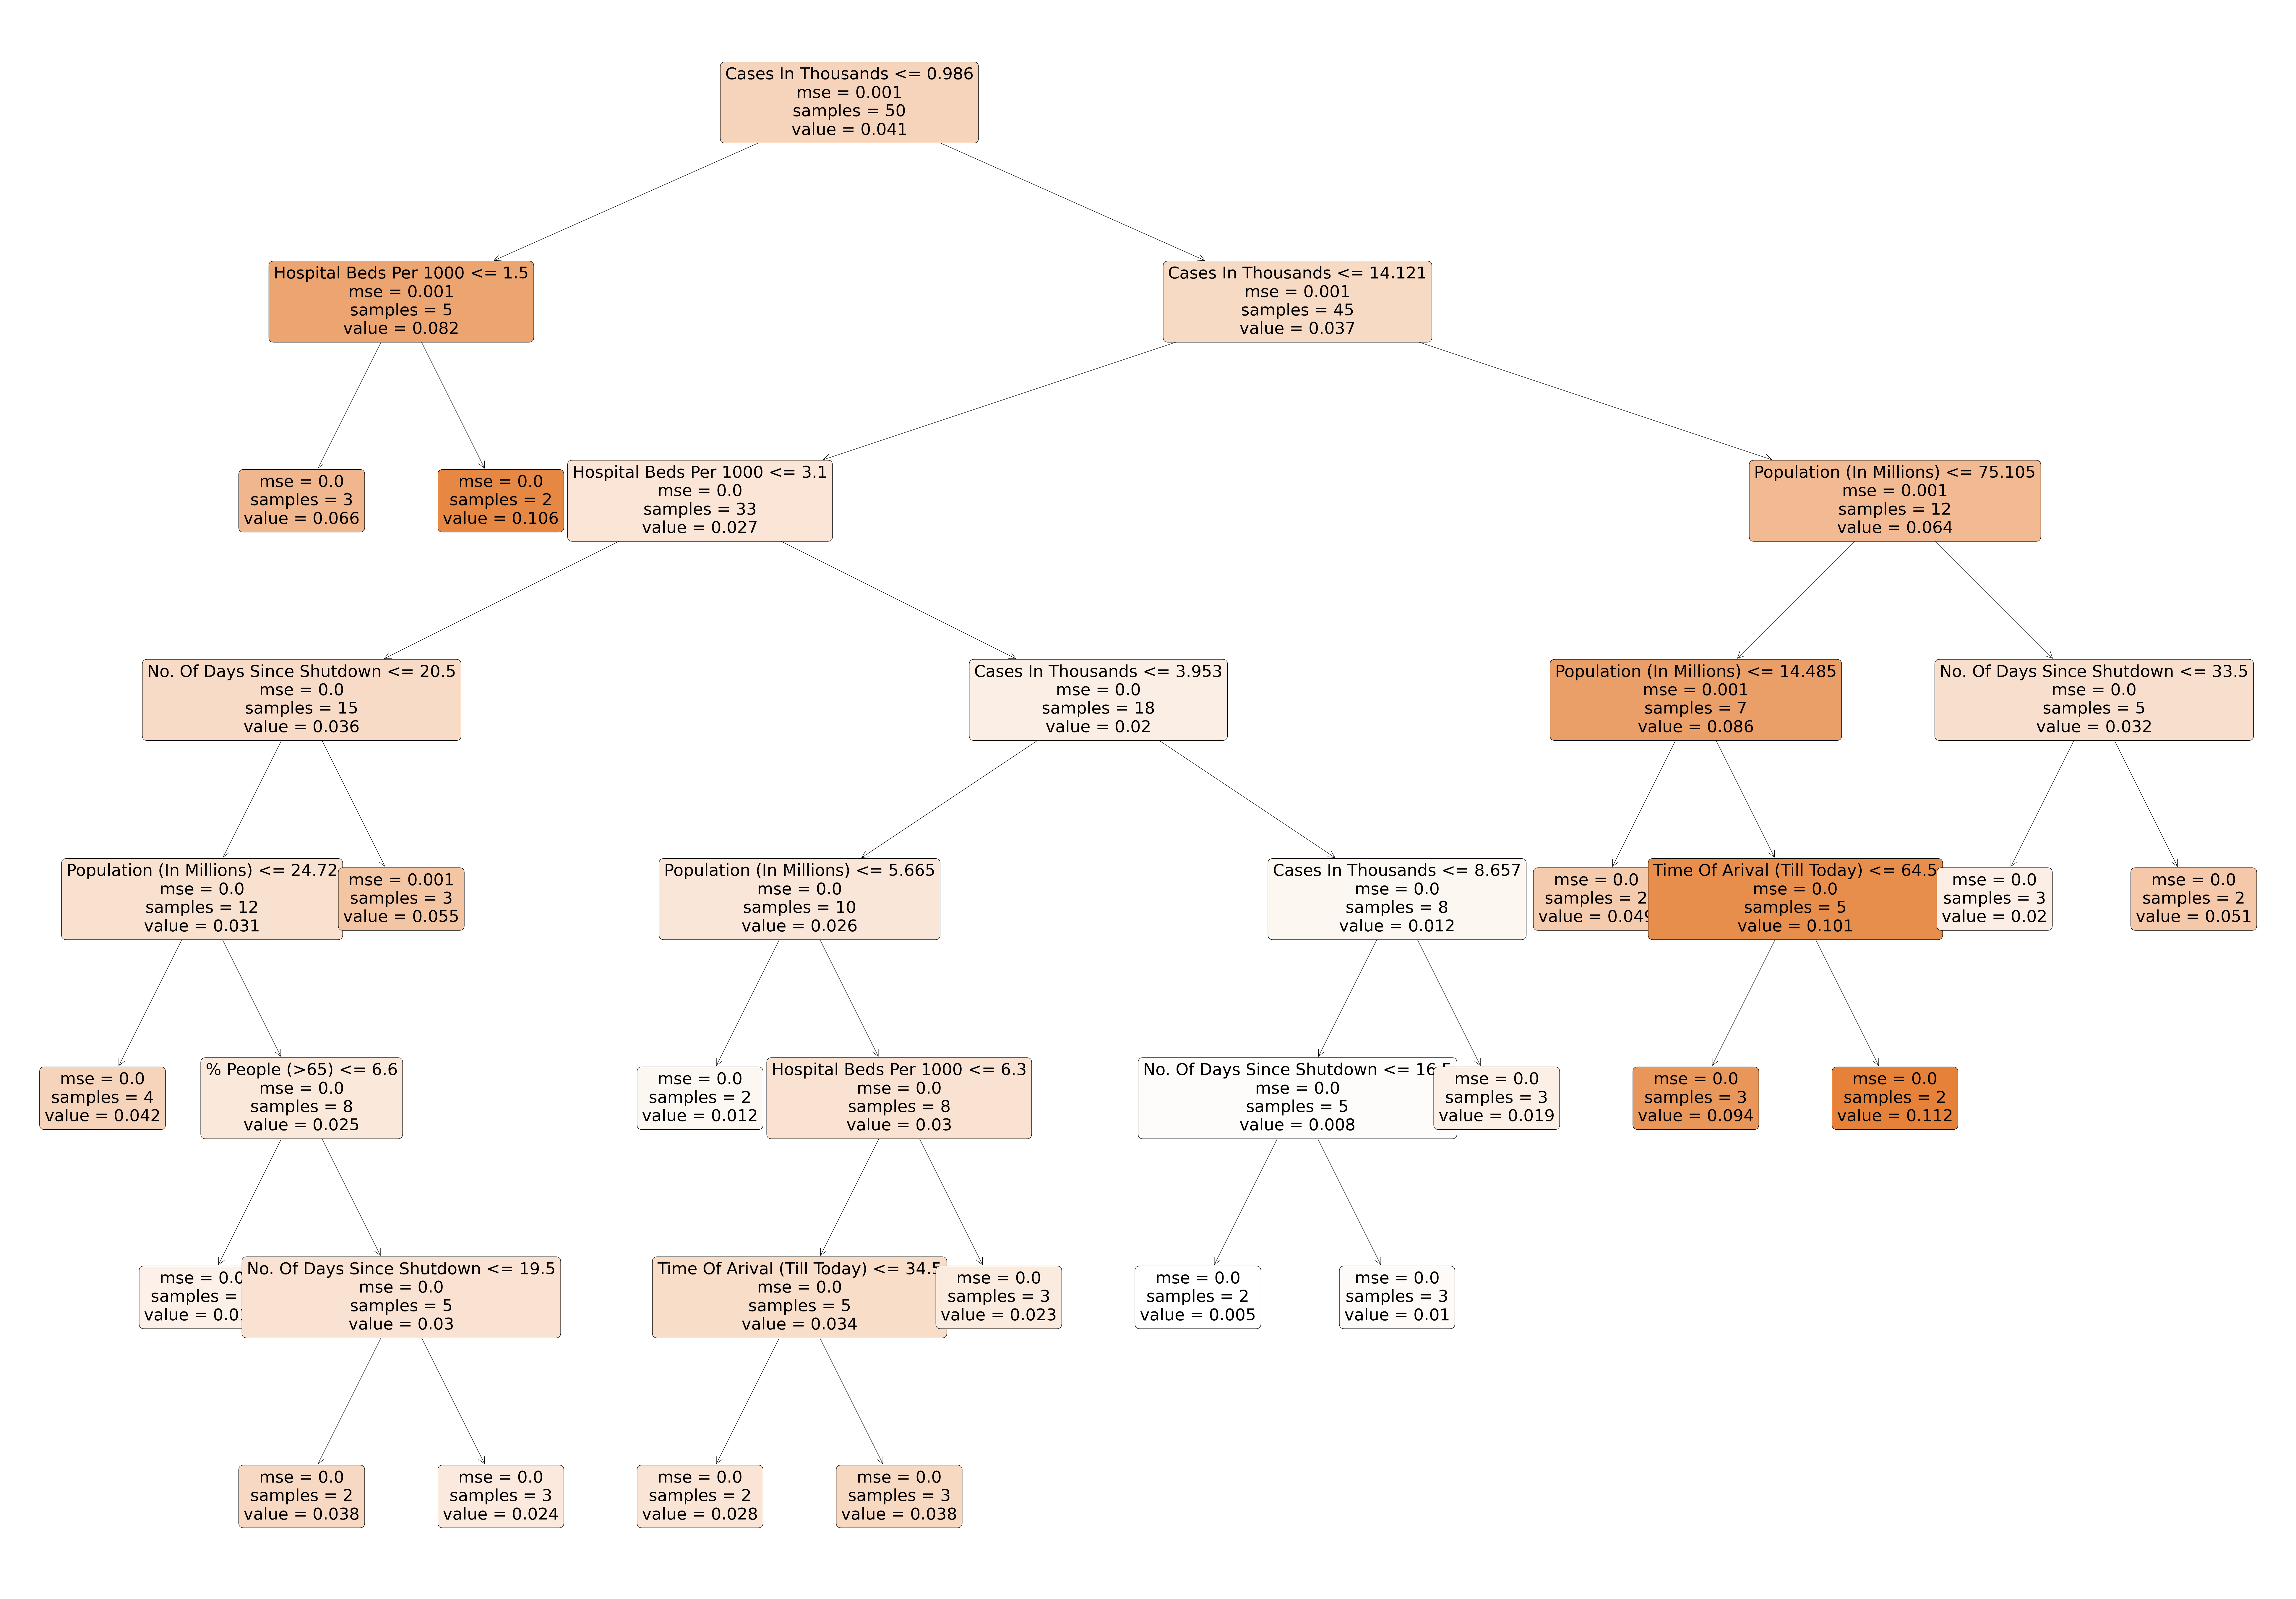

In [10]:
plt.figure(figsize=(100,70))
features = X.columns.str.title()
tree.plot_tree(model,fontsize=40, feature_names=features,
               filled=True, node_ids=False, rounded=True)
plt.show()

The regression tree displayed above shows the relationship between the important causal variables and *CFR*. 

The RT starts with *the total number of COVID-19 cases* as the most crucial causal variable in the **first parent node**. In each box, the top most numerical values suggest the *CFR* estimates based on the tree.
One of the key findings of the tree is the following rule: 
- When *the number of cases of a country* is greater than 14,000 having a *population* between 14 and 75 million are having second highest *case fatality rate*, approximately of 10%.

##### Different Representation of The Regression Tree

Similarly, one can see all the **rules** generated by the RT to get additional information about the relationships between control parameters and the response CFR variable with this visualization; it shows the **distribution of decision feature** in each node and the *estimated CFR value on the leaf*, in the case of regression tasks.

We have decided to implement this type of visualization for a better understanding of the technique, indeed we can see the way the **CART** algorithm *splits* the data.

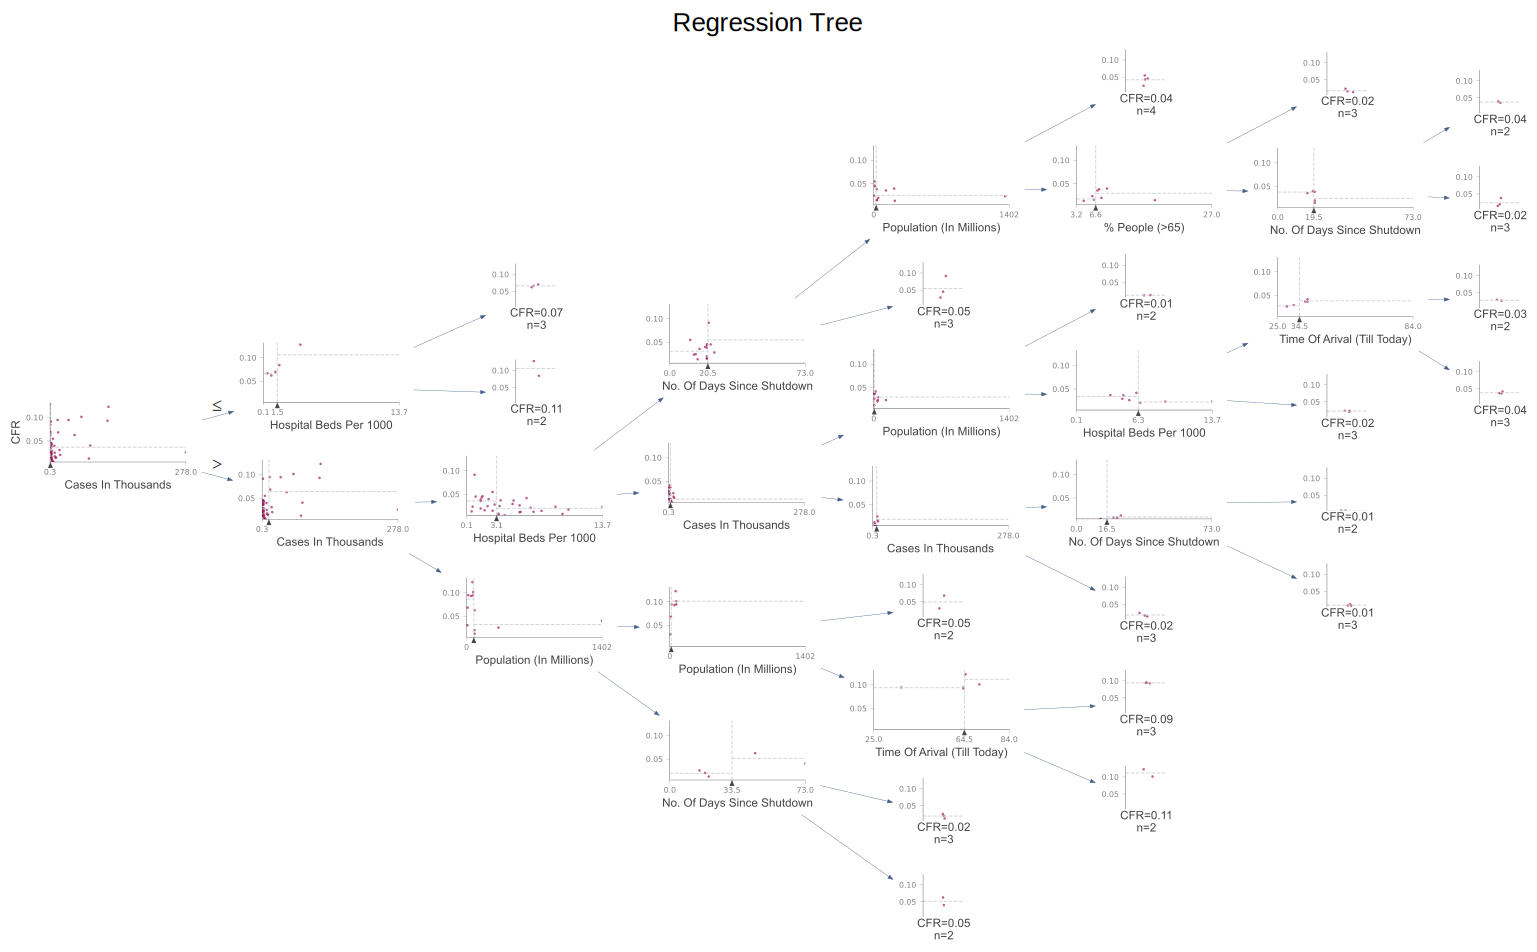

In [11]:
from dtreeviz.trees import   
viz = dtreeviz(model, X, y,
               target_name="CFR", feature_names= features,
               title='Regression Tree', fontname="Arial", title_fontsize=20,
               scale=1.3, orientation="LR", show_node_labels = False,
               colors={'title':'black', 'text':'#14213d', 'arrow':'#455e89',
                       'scatter_marker':'#a01a58','tick_label':'grey','split_line':'#CED4DA'})
viz

##### Variable Importance Plot

The following plot shows how much the single variables affect the model. We can see that the most important variable is the number of cases of each country, followed by the *total population*, *the number of beds in hospitals* and the *number of days since shutdown*. 
The **variable importance** of our model varies a little from the one in the article. Two of the first four variables are different: in the paper the variables "*doctors per 1000 people*" and "*percentage of People > 65*" have a strong influence on the model. This difference is mainly due to the type of software used as explained before.

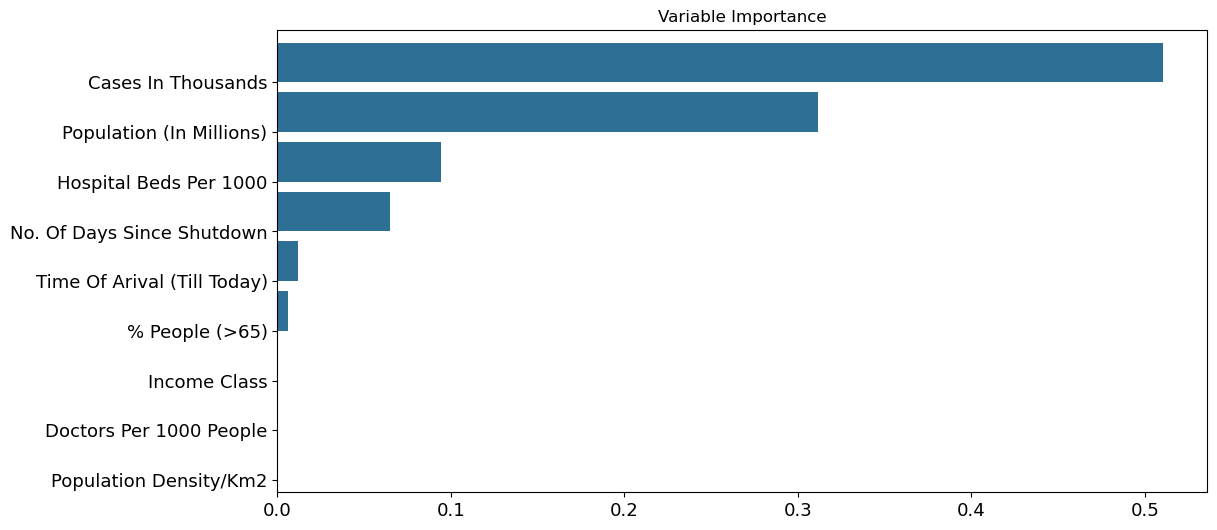

In [12]:
(pd.Series(model.feature_importances_,
           index= X.columns.str.title( ))
   .nsmallest(10) #To plot the 5 most important variables
   .plot(kind='barh',
         title = 'Variable Importance', figsize = [12,6],
         table = False, fontsize = 13, color = '#2e6f95',
         align='edge', width=0.8));

### RT Europe

After having performed an RT including 50 countries of the world we thought to group the countries in continents. The idea was to perform a regression tree for every continent but unfortunately the observations were few. The continent with most observation is **Europe** (23) and we did an RT only for this continent because performing an RT with few data is meaningless.

However, it might be a good idea for future works to analyze the *CFR* by continent or region, in order to help the governments to take decisions about restrictions and medical improvement. 

In this case the variable which most influences the model is *Population/$Km^2$*: this means that social distancing and wearing masks could be effective to avoid the spread of the virus.

In [13]:
world = pd.read_csv("https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv")
world.replace('US', 'USA', inplace=True)
world.replace('United Kingdom', 'UK', inplace=True)
world.replace('CZ', 'Czechia', inplace=True)
world.replace('Russian Federation', 'Russia', inplace=True)
world.replace('Korea, South', 'S. Korea', inplace=True)

final = pd.merge(covid_data, world, 'left', on='Country')

final1 = final.groupby('Continent')
Africa = final1.get_group('Africa') #3 observations
Asia = final1.get_group('Asia') #13 observations
Europe = final1.get_group('Europe') #23 observa tion
N_America = final1.get_group('North America') #5 observation
S_America = final1.get_group('South America') #5 observation
Oceania = final1.get_group('Oceania') #1 observation

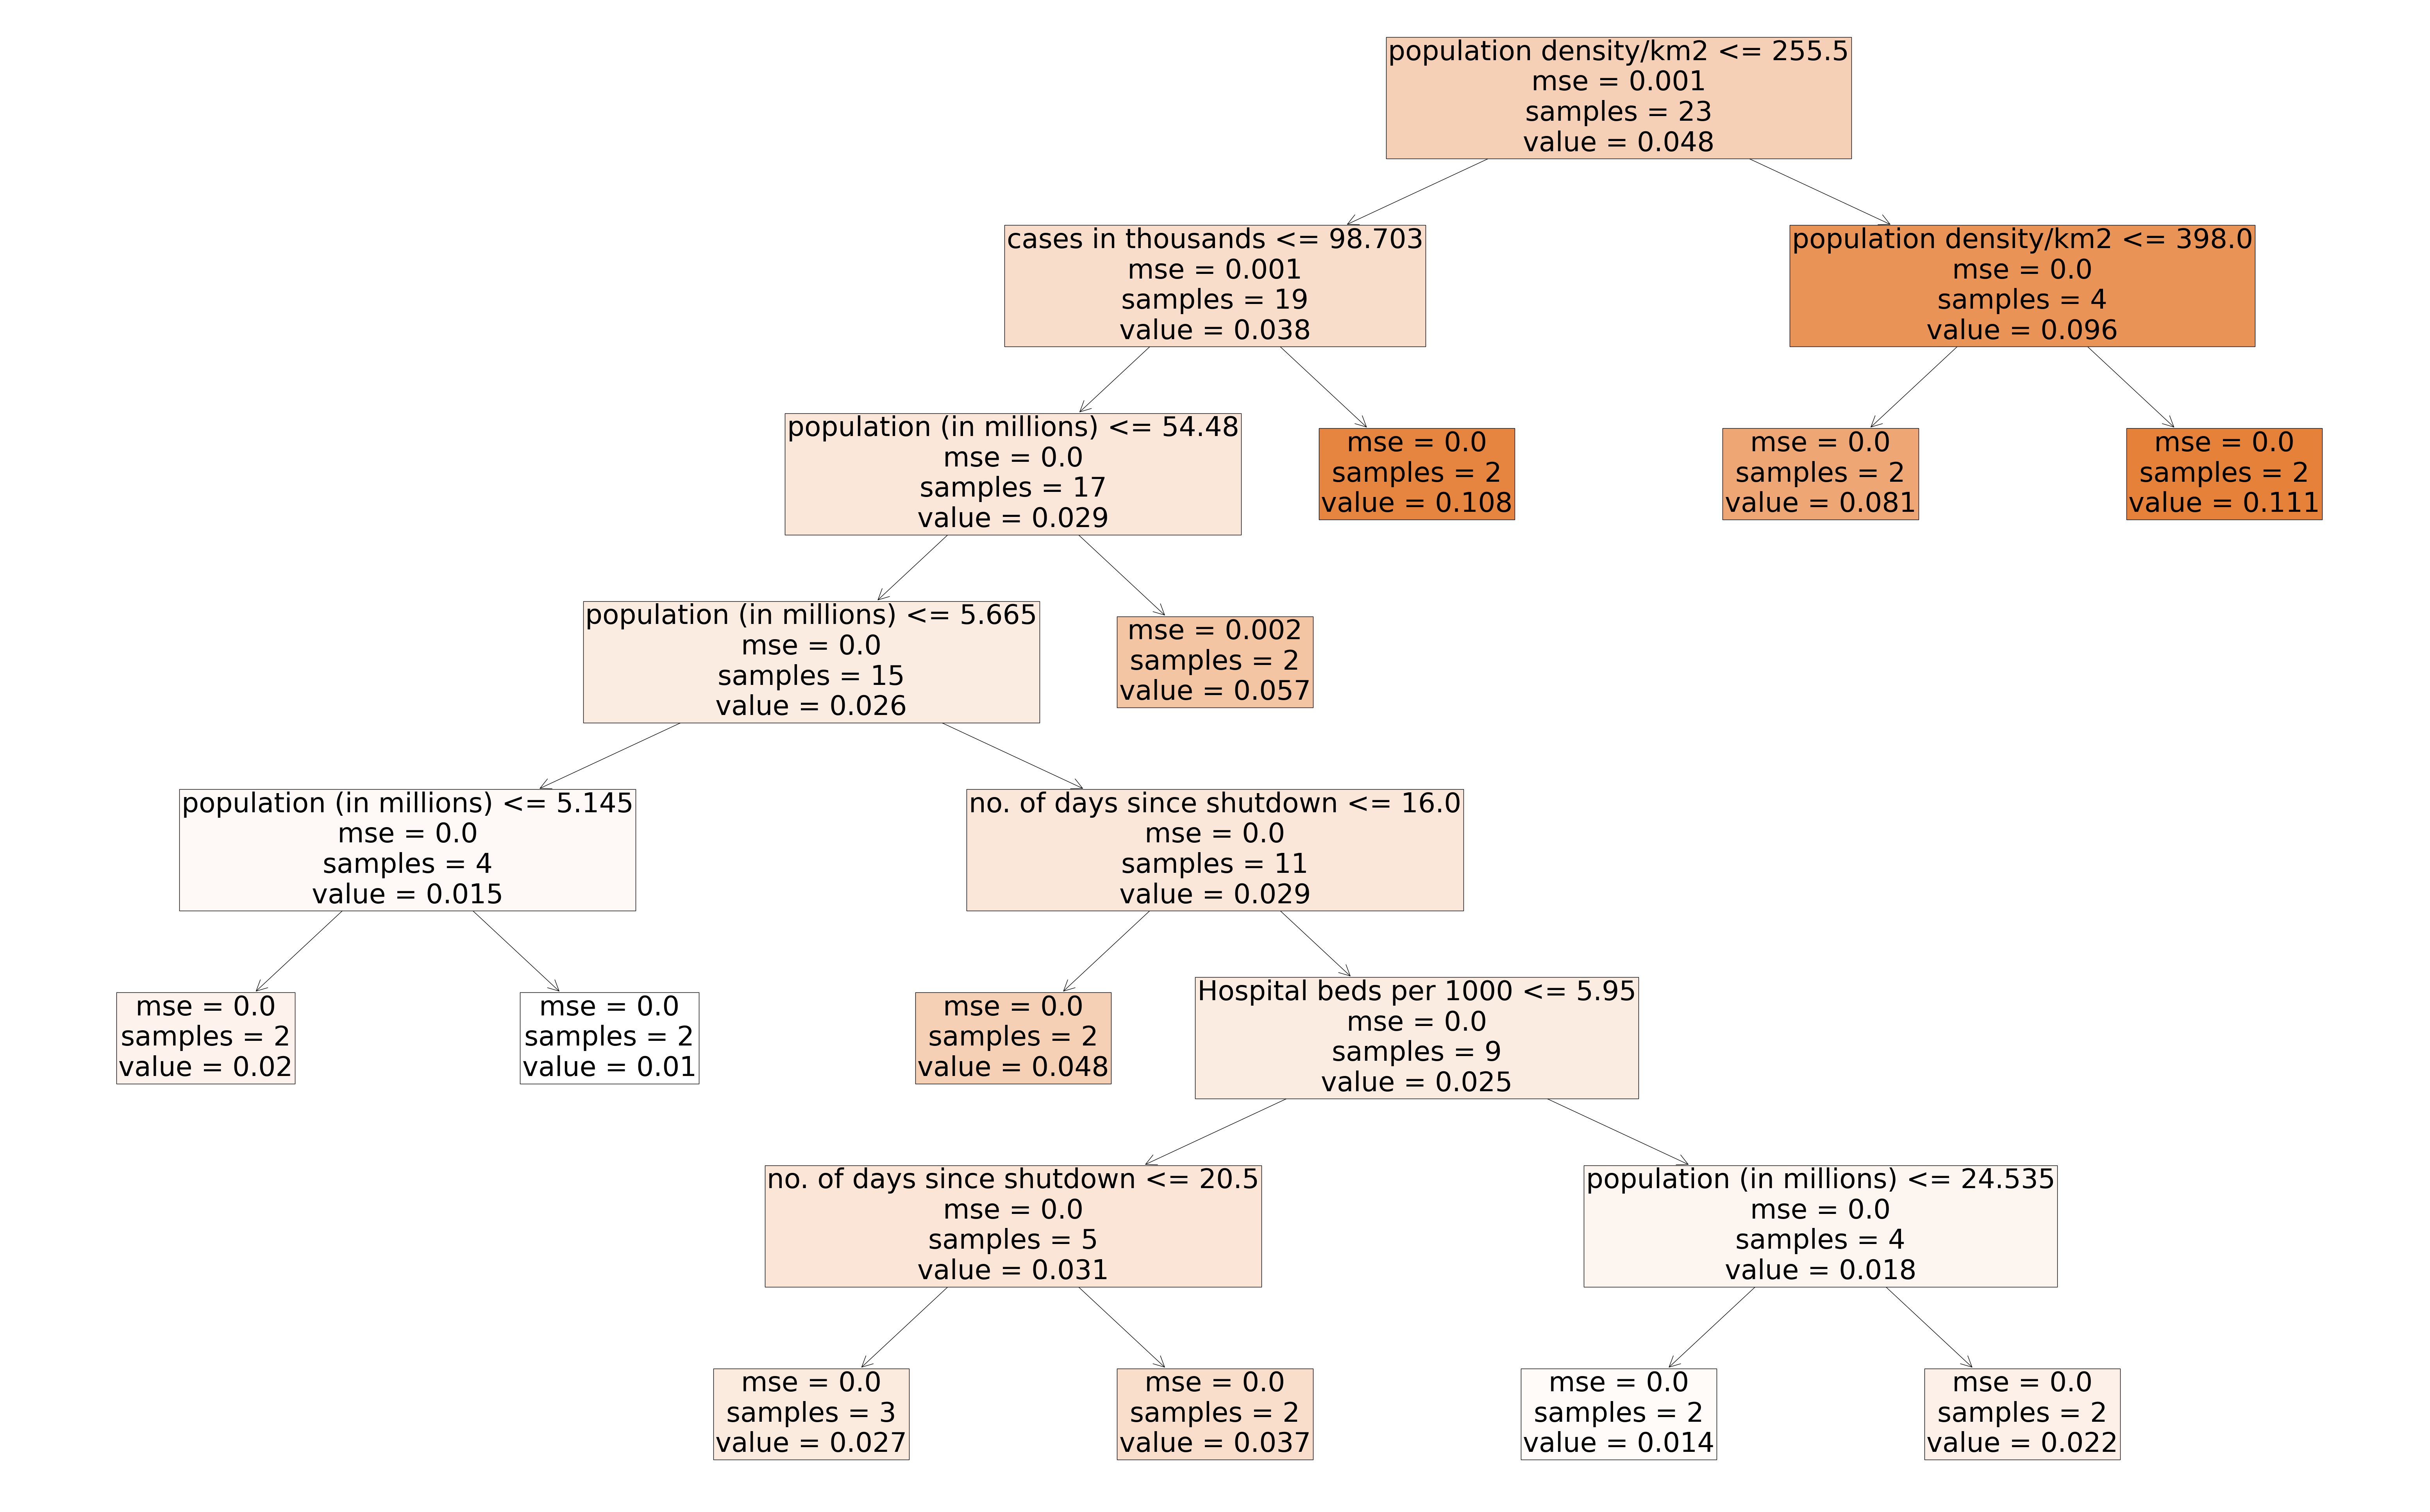

In [14]:
X3 = Europe.drop(columns=['CFR', 'Continent', 'Country', 'Total deaths', 'Climate zones'])
y3 = Europe['CFR']

#min split 10%, so in this case =2
model3 = tree.DecisionTreeRegressor(criterion= "mse", min_samples_split = 2, max_depth=15, min_samples_leaf=2)
model3.fit(X3,y3)
plt.figure(figsize=(80,50))
features = X3.columns
tree.plot_tree(model3, feature_names=features,filled=True, fontsize=50)
plt.show()

The most important findings:

- when the population density is greater than $255.5/km^2$,

  -   the case fatality rate is approximately 10%
  -   if the cases are less than 16 thousands, the CFR is 11%
- whereas if the population density is less than $255.5/km^2$,

  -  and the cases are more than 98.7 thousands, the CFR is 11%

  - otherwise, if the cases are less than 98.7 thousands and the time of arrival is greater than 67 days, the CFR is

##### Different Representation of The Regression Tree

We have proposed again the alternative visualization also for this model; within each node, the decision features are plotted alongside their distribution and the estimated response by the leaf.

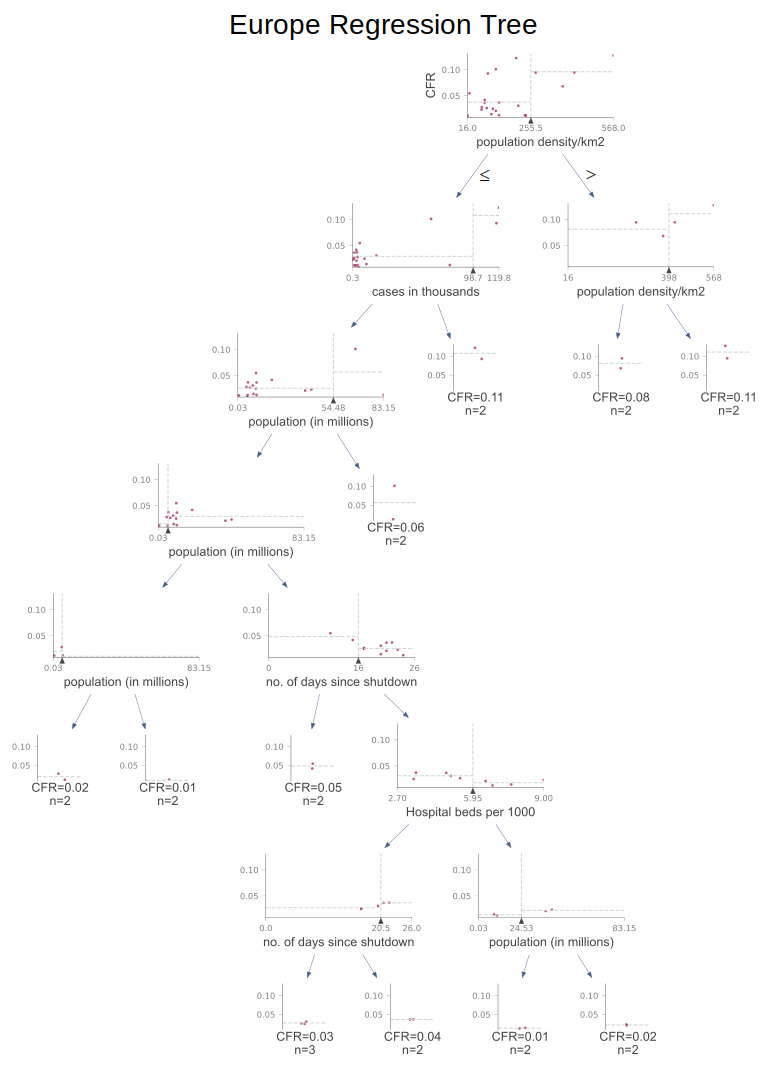

In [15]:
viz2 = dtreeviz(model3, X3, y3,
               target_name="CFR", feature_names= features,
               title='Europe Regression Tree', fontname="Arial", title_fontsize=20,
               scale=1.4, show_node_labels = False, 
               colors={'title':'black', 'text':'#14213d', 'arrow':'#455e89',
                       'scatter_marker':'#a01a58','tick_label':'grey','split_line':'#CED4DA'})
viz2

##### Variable Importance Plot

This plot again shows how much the single variables affect our model. We can see that the most important variable is still the *number of cases* of each country, followed by the *population density*, the *time of arrival* and the *number of days since shutdown*.

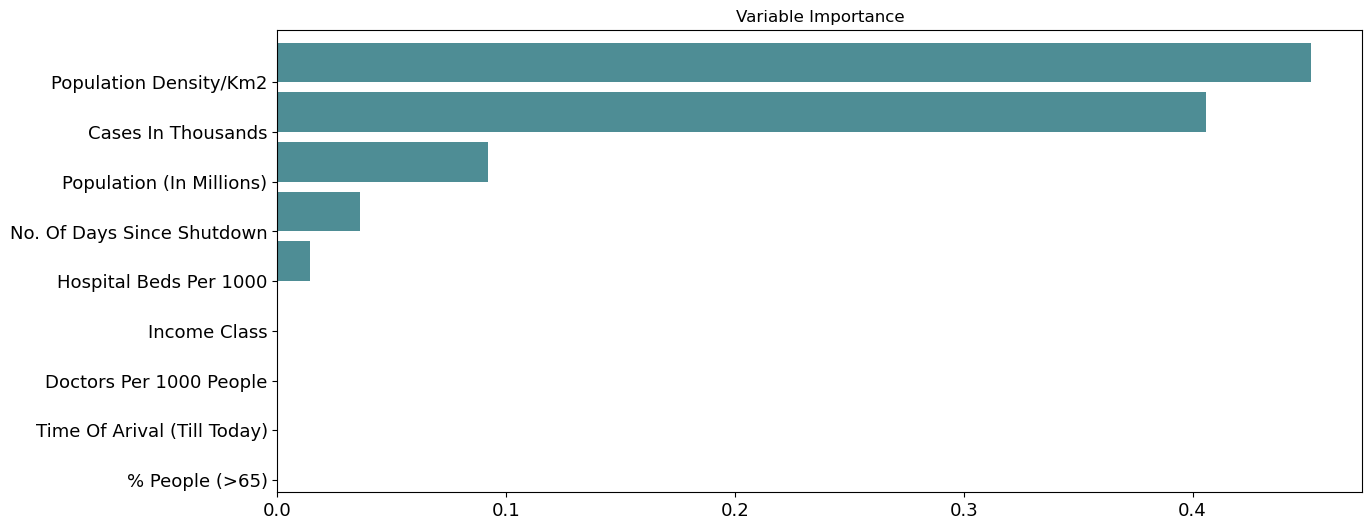

In [16]:
(pd.Series(model3.feature_importances_,
           index= X3.columns.str.title())
   .nsmallest(10) #To plot the 5 most important variables
   .plot(kind='barh', title = 'Variable Importance',
         figsize = [14,6], table = False, fontsize = 13, color = '#4E8d95', align='edge', width=0.8));

## Metrics

When assessing how well a model fits a dataset, we use the *Root Mean Squared Error* (**RMSE**). The RMSE is a metric computed as the square root of the average squared difference between the predicted values and the actual values in a dataset:



$$RMSE=\sqrt{\sum{(\hat{y_i}-y_i)^2}\over{n}}$$



where:



- $\hat{y}$ is the predicted value for the $i-th$ observation
- $y_i$ is the observed value for the $i-th$ observation
- $n$ is the sample size

The *Mean Absolute Error* (**MAE**) is a measure of errors between paired observations expressing the same phenomenon



$$MAE = {\sum{|\hat{y_i}-y_i|}\over{n}}$$



$MAE$ is conceptually simpler and also easier to interpret than $RMSE$: 
> it is simply the average absolute vertical or horizontal distance between each point in a scatter plot as it is the average absolute difference between $\hat{y_i}$ and $y_i$.



Furthermore, each error contributes to $MAE$ in proportion to the absolute value of the error. This is in contrast to $RMSE$, which involves squaring the differences, so that a few large differences will increase the $RMSE$ to a greater degree than the $MAE$.




The coefficient of determination, denoted $R^{2}$ or $r^{2}$ and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable.



The most general definition of the coefficient of determination is



$$R^{2} = 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}$$



where, the *sum of squares of residuals*, also called the *residual sum of squares* is:



$${SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$$



and the *total sum of squares* (proportional to the variance of the data):



$${SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$$



$R^{2}$ value is included between 0 (the independent variables appears to be correlated, hence the model is not good) and 1 (the independent variables are not correlated, hence the model is good).



with:
- *ei*, the *residuals* of the model defined as: ${ei} = {yi} − {fi}$
- *fi*, the fitted (or predicted) values of the model
- *${\bar {y}}$*, the mean of the observed data: ${\bar {y}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}}$



The $AdjR^{2}$ (Adj stands for Adjusted) is a modified version of $R^{2}$ that has been adjusted for the number of predictors in the model. It is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables and it is defined as:



$${\bar {R}}^{2}=1-(1-R^{2}){n-1 \over n-p-1}$$



This value is always lower than $R^{2}$ and can be negative, altough is usually positive.



These metrics are used to evaluate the predictive performance of the tree models used in this study.
A good predictive model should have the errors **RMSE** and **MAE** low (near zero) and the $R^{2}$ and $AdjR^{2}$ high (near one).

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

RMSE = 0.013
MAE = float('nan')
r2 = 0.896
Adj_r2 = 0.769

y_pred = model.  (X)

RMSE2 = np.round(mean_squared_error(y, y_pred, squared=False), 4) 
MAE2 = np.round(mean_absolute_error(y, y_pred),4)
r2_2 = np.round(r2_score(y, y_pred),2)
Adj_r2_2 = np.round(1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1),2)

y_pred3 = model3.predict(X3)

RMSE3 = mean_squared_error(y3, y_pred3, squared=False)
MAE3 = mean_absolute_error(y3, y_pred3)
r2_3 = r2_score(y3, y_pred3)
Adj_r2_3 = 1 - (1-r2_score(y3, y_pred3)) * (len(y3)-1)/(len(y3)-X3.shape[1]-1)

(pd.DataFrame({'RMSE':[RMSE, RMSE2, RMSE3], 'MAE' :[MAE, MAE2, MAE3],
               'R^2': [r2, r2_2, r2_3], 'Adjusted R^2': [Adj_r2, Adj_r2_2, Adj_r2_3]}, 
              index = ['Paper Model Metrics', 'Our Model Metrics', 'EU Model Metrics'])
 .style.set_caption("Models Metrics")
 .set_table_styles([{'selector': 'caption', 'props': 'caption-side: top; font-size:1.8em;'}])
 .format(formatter={('RMSE'): lambda x: "{:,.3f}".format(x), ('MAE'): lambda x: "{:,.3f}".format(x),
                    ('R^2'): lambda x: '{:,.3f}'.format(x), ('Adjusted R^2'): lambda x: '{:,.3f}'.format(x)}))

We get different results for the same algorithm on the same machine implemented by different languages, such as R and Python. 

We think that these small differences in the implementation of the underlying math libraries used will cause differences in the resulting model and predictions made by that model.

Infact the **RMSE** reported in the *paper* corresponds to $0.013$. Whereas the RMSE computed by ourselves using `R` was $0.012$ and using `Python` was $0.010$ as shown.

We also computed the $R^{2}$ and $AdjR^{2}$, with very few differences if compared to original model. The MAE was not computed by the authors of the *paper* but it is not an issue because the **RMSE** is present and it is enough to evaluate the error.The metrics referring to the EU model are good in terms of prediction as well.

## Results and models comparison

The authors of the original paper suggested that the *total number of cases*, *age distributions*, and *shutdown period* have high impacts on the CFR estimates, but interestingly they found four more essential causal variables:

 - total population (in millions) of the country,
 - doctors per 1000 people in the country,
 - time-period (in days) of COVID-19 cases for the country,
 - hospital beds per 1000 people in the country.
 
Therefore, **seven** are the causal variables obtained out of ten potential input variables having higher importance. It is possible to decrease the fatality rate solving the problems regarding each variable which affects the model.

In our model the variables affecting most the model are:
 - the total number of cases, 
 - the total population, 
 - the hospital beds per 1000 people, 
 - the shutdown period
 
whereas, for the **Europe model** are *population density* and *cases in thousand* the two variables that have the most influence in the model. The *population* and the *number of days since shutdown* play also a role in affecting the model.

To prevent the virus from spreading and to avoid the death of people, governments should take into consideration to use restrictions based on these statistical results. 

For instance, if a model has *hospital beds per 1000 people* as the variable which most influences it, more hospital beds should be provided; if instead the most affecting variable is *population density*, maybe the use of masks and the frequent hand washing is preferred because one gets in touch with a lot of people diary.



# Limitations of our findings

The assumptions that the authors for sake of simplicity are listed as follows: 
    
   1. the virus mutation rates are not comparable for different countries; 
   2. the recovered persons will achieve permanent immunity against COVID-19; 
   3. we ignore the effect of climate change (also spatial data structures) during the short-term predictions.

Nowadays, one year and a half after this study we know that the recovered persons will not achieve permanent immunity against COVID-19, altough at the time it seemed a good assumptions even if it was a strong one.

However, as mentioned in the paper, there may exists other controllable factors and some disease-based characteristics that can also have an impact on the value of CFR for different countries.

Since the number of data points in both the datasets is limited thus going for advanced deep learning techniques will simply over-fit the datasets.

# Conclusions

Throughout the paper, we have re-prosed the analysis cited by the authors of the paper **"Applications of machine learning and artificial intelligence for Covid-19 (SARS-CoV-2) pandemic: A review"**, within the section *2.3 "ML and AI technology in SARS-CoV-2 prediction and forecasting"*, as *reference 41*: **Real-time forecasts and risk assessment of novel coronavirus (COVID-19) cases: A data-driven analysis**.  

In the first part we have checked the forecast computed by the authors, by plotting the results against the observed epidemic data, highlighting the differences among the countries.

Secondly, we have computed the regression tree implemented in the original paper to asses the risk associated with covid-19 data and some demographical features of the selected countries. The variables that resulted affecting the most the model for the authors are:
 - total population (in millions) of the country,
 - doctors per 1000 people in the country,
 - time-period (in days) of COVID-19 cases for the country,
 - hospital beds per 1000 people in the country.
 
Our results, are similar to those of the original paper, however there are some slightly differences in some nodes. Our most important variables are:
 - the total number of cases, 
 - the total population, 
 - the hospital beds per 1000 people, 
 - the shutdown period

We have supposed that these differences are due to computational errors arose when switching from `R` to `Python`, still these do not affect the overall interpretation of the model. 


Among the classical representation of the RT, we proposed an alternative visualization of the regression tree, displaying the distribution of the decision feature in each node and the estimated *CFR* value on the leaf; this allowed us to present the way the **CART** algorithm splits the data.

Then, we suggested our idea which consisted into aggregating the countries by continents, in order to perform a regression tree for each continent, although the limited observations did not allowed us to compute a robust analysis for other continents except Europe. The results provided a change in the features importance, compared to the original model. For the **Europe model**, the two variables that have the most influence in the model are *population density* and *cases in thousand* . The *population* and the *number of days since shutdown* play also a role in affecting the model.

The authors of **"Applications of machine learning and artificial intelligence for Covid-19 (SARS-CoV-2) pandemic: A review"** suggested that this paper, among several others has provided evidence that *AI* and *ML* can significantly improve treatment, forecasting and contact tracing for the Covid-19 pandemic and  reduce the human intervention in medical practice.

Summing up, we agreed to what they claim, specially because the model was quite reliable and that most of the models are not deployed enough to show their real-world operation, but they are still up to the mark to tackle the pandemic. 

##### Thank you for your attention!

It is possible to read the full project at the link: https://alecrsf.netlify.app/en/project/py-covid_risk_rt/